<a href="https://colab.research.google.com/github/TaysTyas/Bakudan/blob/master/Copy_of_svd_train_test_split_with_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.metrics.pairwise import pairwise_distances
import math
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.sparse as sp
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
# membaca dataset ratings dari file CSV
data_rating = pd.read_csv('https://raw.githubusercontent.com/TaysTyas/Dataset-movie/main/Dataset%20MovieLens/ratings.csv')

ratings_base, ratings_test = train_test_split(data_rating, test_size=0.3, random_state=42)

In [32]:
# Create user - item matrix (row: user, column: item) start at 0
train_matrix_pivot = ratings_base.pivot(index="userId", columns="movieId", values="rating")
test_matrix_pivot = ratings_test.pivot(index="userId", columns="movieId", values="rating")

train_matrix_pivot.shape, test_matrix_pivot.shape

((610, 8566), (610, 6124))

In [33]:
train_avrg = train_matrix_pivot.mean(axis=1)
centerd_train = train_matrix_pivot.sub(train_avrg,axis=0)

In [34]:
centerd_train.fillna(0,inplace=True)
test_matrix = test_matrix_pivot.fillna(0)

test_matrix = test_matrix.to_numpy()
train_matrix = centerd_train.to_numpy()

In [6]:
train_matrix

array([[-0.32947977,  0.        , -0.32947977, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.62953368,  0.        , -1.12953368, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31034483,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.30466149,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
test_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## k 1-10%

In [ ]:
k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0
k6 = 0
k7 = 0
k8 = 0
k9 = 0
k10 = 0
for j in range(10):
  k = [6, 12, 18, 24, 30, 36, 42, 48, 54, 61]
  for i in k:
    # Get u,s,vt by using SVD with k = 20
    u, s, vt = svds(train_matrix, k = i)
    # Construction diagonal matrix
    s_diag_matrix = np.diag(s)
    # Get the predictions by finding the dot product of the three matrices
    # np.dot(a,b) returns the dot product of a and b.
    predictions_svd = np.dot(np.dot(u,s_diag_matrix),vt)
    predictions_svd = predictions_svd + train_avrg.values.reshape(-1,1)
    # Get predicted ratings from predictions svd matrix
    # trả về ma trận có rating khác 0, dựa trên ma trận test_matrix
    # Ground truth target values.
    predicted_ratings_svd = predictions_svd[test_matrix.nonzero()]
    # Estimated target values.
    test_truth = test_matrix[test_matrix.nonzero()]
    # Calculate MAE
    MAE = mean_absolute_error(predicted_ratings_svd,test_truth)
    if i==6:
      k1 += MAE
      print(k1)
    elif i==12:
      k2 += MAE
      print(MAE)
    elif i == 18:
      k3  += MAE
      print(MAE)
    elif i == 24:
      k4   += MAE
      print(MAE)
    elif i == 30:
      k5   += MAE
      print(MAE)
    elif i == 36:
      k6   += MAE
      print(MAE)
    elif i == 42:
      k7   += MAE
      print(MAE)
    elif i == 48:
      k8   += MAE
      print(MAE)
    elif i == 54:
      k9   += MAE
      print(MAE)
    elif i == 61:
      k10   += MAE
      print(MAE)
      print()

0.7447006189413654
0.7466695520177801
0.7479312250797655
0.7491395231376904
0.7505670831182634
0.7521298442541925
0.7533616093283068
0.754132159487022
0.7544853595887514
0.7549846827756006

1.4894012378827308
0.7466695520177801
0.7479312250797656
0.7491395231376904
0.7505670831182634
0.7521298442541925
0.753361609328307
0.754132159487022
0.7544853595887514
0.7549846827756006

2.234101856824096
0.7466695520177801
0.7479312250797655
0.7491395231376904
0.7505670831182634
0.7521298442541924
0.7533616093283069
0.754132159487022
0.7544853595887514
0.7549846827756006

2.9788024757654616
0.7466695520177801
0.7479312250797655
0.7491395231376904
0.7505670831182634
0.7521298442541923
0.7533616093283069
0.754132159487022
0.7544853595887514
0.7549846827756006

3.7235030947068273
0.7466695520177801
0.7479312250797656
0.7491395231376904
0.7505670831182634
0.7521298442541925
0.753361609328307
0.754132159487022
0.7544853595887514
0.7549846827756006

4.468203713648193
0.7466695520177801
0.74793122507976

In [ ]:
k = [6, 12, 18, 24, 30, 36, 42, 48, 54, 61]
for i in k:
  if i==6:
    print(f"Nilai MAE untuk k = {i} : {np.round(k1/10, 3)}")
  elif i==12:
    print(f"Nilai MAE untuk k = {i} : {np.round(k2/10, 3)}")
  elif i == 18:
    print(f"Nilai MAE untuk k = {i} : {np.round(k3/10, 3)}")
  elif i == 24:
    print(f"Nilai MAE untuk k = {i} : {np.round(k4/10, 3)}")
  elif i == 30:
    print(f"Nilai MAE untuk k = {i} : {np.round(k5/10, 3)}")
  elif i == 36:
    print(f"Nilai MAE untuk k = {i} : {np.round(k6/10, 3)}")
  elif i == 42:
    print(f"Nilai MAE untuk k = {i} : {np.round(k7/10, 3)}")
  elif i == 48:
    print(f"Nilai MAE untuk k = {i} : {np.round(k8/10, 3)}")
  elif i == 54:
    print(f"Nilai MAE untuk k = {i} : {np.round(k9/10, 3)}")
  elif i == 61:
    print(f"Nilai MAE untuk k = {i} : {np.round(k10/10, 3)}")


Nilai MAE untuk k = 6 : 0.745
Nilai MAE untuk k = 12 : 0.747
Nilai MAE untuk k = 18 : 0.748
Nilai MAE untuk k = 24 : 0.749
Nilai MAE untuk k = 30 : 0.751
Nilai MAE untuk k = 36 : 0.752
Nilai MAE untuk k = 42 : 0.753
Nilai MAE untuk k = 48 : 0.754
Nilai MAE untuk k = 54 : 0.754
Nilai MAE untuk k = 61 : 0.755


In [36]:
# Get u,s,vt by using SVD with k = 20
u, s, vt = svds(train_matrix, k = 6)
# Construction diagonal matrix
s_diag_matrix = np.diag(s)
# Get the predictions by finding the dot product of the three matrices
# np.dot(a,b) returns the dot product of a and b.
predictions_svd = np.dot(np.dot(u,s_diag_matrix),vt)
predictions_svd = predictions_svd + train_avrg.values.reshape(-1,1)
# Get predicted ratings from predictions svd matrix
# trả về ma trận có rating khác 0, dựa trên ma trận test_matrix
# Ground truth target values.


In [37]:
predicted_svd_df = pd.DataFrame(predictions_svd)
predicted_svd_df

,0,1,2,3,4,5,6,7,8,9,...,8556,8557,8558,8559,8560,8561,8562,8563,8564,8565
0,4.402601,4.314772,4.318185,4.323529,4.274491,4.364680,4.307427,4.319328,4.334661,4.319029,...,4.327990,4.329530,4.329464,4.329497,4.329497,4.329464,4.329497,4.329464,4.329464,4.329678
1,3.912173,3.915009,3.912122,3.913301,3.922145,3.913930,3.915146,3.914199,3.910598,3.919628,...,3.913107,3.913057,3.913039,3.913048,3.913048,3.913039,3.913048,3.913039,3.913039,3.913066
2,2.757434,2.763936,2.763651,2.762488,2.770940,2.758754,2.767899,2.760044,2.761308,2.763787,...,2.761357,2.760891,2.760863,2.760877,2.760877,2.760863,2.760877,2.760863,2.760863,2.760828
3,3.449339,3.446230,3.456231,3.462613,3.403147,3.434931,3.451742,3.460158,3.449218,3.469924,...,3.461444,3.460990,3.460994,3.460992,3.460992,3.460994,3.460992,3.460994,3.460994,3.460885
4,3.661118,3.651623,3.660369,3.654173,3.639819,3.659513,3.647658,3.654338,3.660916,3.642962,...,3.655637,3.656250,3.656250,3.656250,3.656250,3.656250,3.656250,3.656250,3.656250,3.656269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.820799,3.571397,3.603903,3.609996,3.400879,3.733650,3.516918,3.627615,3.642826,3.524125,...,3.634745,3.642863,3.643327,3.643095,3.643095,3.643327,3.643095,3.643327,3.643327,3.643932
606,3.713210,3.709603,3.724411,3.709119,3.701287,3.722736,3.697127,3.714040,3.725698,3.682636,...,3.712702,3.714248,3.714297,3.714273,3.714273,3.714297,3.714273,3.714297,3.714297,3.714355
607,3.607435,3.060572,3.005945,3.082159,2.886687,3.399891,2.993735,3.087970,3.145277,3.001256,...,3.118595,3.129059,3.129683,3.129371,3.129371,3.129683,3.129371,3.129683,3.129683,3.131036
608,3.328846,3.307757,3.306082,3.308288,3.299600,3.321589,3.303707,3.308613,3.314347,3.303778,...,3.309782,3.310329,3.310350,3.310339,3.310339,3.310350,3.310339,3.310350,3.310350,3.310406


In [38]:
predicted_svd_df.index = predicted_svd_df.index + 1
predicted_svd_df

,0,1,2,3,4,5,6,7,8,9,...,8556,8557,8558,8559,8560,8561,8562,8563,8564,8565
1,4.402601,4.314772,4.318185,4.323529,4.274491,4.364680,4.307427,4.319328,4.334661,4.319029,...,4.327990,4.329530,4.329464,4.329497,4.329497,4.329464,4.329497,4.329464,4.329464,4.329678
2,3.912173,3.915009,3.912122,3.913301,3.922145,3.913930,3.915146,3.914199,3.910598,3.919628,...,3.913107,3.913057,3.913039,3.913048,3.913048,3.913039,3.913048,3.913039,3.913039,3.913066
3,2.757434,2.763936,2.763651,2.762488,2.770940,2.758754,2.767899,2.760044,2.761308,2.763787,...,2.761357,2.760891,2.760863,2.760877,2.760877,2.760863,2.760877,2.760863,2.760863,2.760828
4,3.449339,3.446230,3.456231,3.462613,3.403147,3.434931,3.451742,3.460158,3.449218,3.469924,...,3.461444,3.460990,3.460994,3.460992,3.460992,3.460994,3.460992,3.460994,3.460994,3.460885
5,3.661118,3.651623,3.660369,3.654173,3.639819,3.659513,3.647658,3.654338,3.660916,3.642962,...,3.655637,3.656250,3.656250,3.656250,3.656250,3.656250,3.656250,3.656250,3.656250,3.656269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.820799,3.571397,3.603903,3.609996,3.400879,3.733650,3.516918,3.627615,3.642826,3.524125,...,3.634745,3.642863,3.643327,3.643095,3.643095,3.643327,3.643095,3.643327,3.643327,3.643932
607,3.713210,3.709603,3.724411,3.709119,3.701287,3.722736,3.697127,3.714040,3.725698,3.682636,...,3.712702,3.714248,3.714297,3.714273,3.714273,3.714297,3.714273,3.714297,3.714297,3.714355
608,3.607435,3.060572,3.005945,3.082159,2.886687,3.399891,2.993735,3.087970,3.145277,3.001256,...,3.118595,3.129059,3.129683,3.129371,3.129371,3.129683,3.129371,3.129683,3.129683,3.131036
609,3.328846,3.307757,3.306082,3.308288,3.299600,3.321589,3.303707,3.308613,3.314347,3.303778,...,3.309782,3.310329,3.310350,3.310339,3.310339,3.310350,3.310339,3.310350,3.310350,3.310406


In [39]:
predicted_ratings_svd = predictions_svd[test_matrix.nonzero()]
# Estimated target values.
test_truth = test_matrix[test_matrix.nonzero()]
# Calculate MAE
MAE = mean_absolute_error(predicted_ratings_svd,test_truth)
print(f"Nilai MAE untuk k = 6 : {MAE}")

Nilai MAE untuk k = 6 : 0.7447006189413654


In [24]:
# Hitung selisih absolut antara prediksi dan nilai aktual
absolute_errors = np.abs(predicted_ratings_svd - test_truth)

# Hitung Mean Absolute Error (MAE)
mae = np.mean(absolute_errors)

print(np.sum(absolute_errors))
print(22527.938/30251)
print("Mean Absolute Error (MAE):", mae)

22527.938423595246
0.7447006049386796
Mean Absolute Error (MAE): 0.7447006189413654


In [25]:
predicted_ratings_svd,test_truth

(array([4.33254291, 4.32928932, 4.31896661, ..., 3.65174248, 3.77071029,
        3.6989647 ]),
 array([5. , 3. , 3. , ..., 5. , 2.5, 3. ]))

In [26]:
test_matrix.nonzero()

(array([  0,   0,   0, ..., 609, 609, 609]),
 array([ 105,  161,  312, ..., 5944, 5961, 6033]))

In [13]:
test_matrix_pivot.columns[105], test_matrix_pivot.columns[161], test_matrix_pivot.columns[312], test_matrix_pivot.columns[5944], test_matrix_pivot.columns[5961], test_matrix_pivot.columns[6033]


(151, 223, 423, 158238, 160341, 170875)

In [14]:
len(test_truth), len(predicted_ratings_svd)

(30251, 30251)

In [15]:
predictions_svd

array([[4.40260082, 4.31477168, 4.318185  , ..., 4.32946387, 4.32946387,
        4.32967808],
       [3.912173  , 3.9150088 , 3.9121217 , ..., 3.91303907, 3.91303907,
        3.91306556],
       [2.75743433, 2.76393642, 2.76365139, ..., 2.76086268, 2.76086268,
        2.76082763],
       ...,
       [3.60743494, 3.06057162, 3.00594462, ..., 3.129683  , 3.129683  ,
        3.13103631],
       [3.32884591, 3.30775658, 3.30608212, ..., 3.31034982, 3.31034982,
        3.31040588],
       [4.20361872, 3.66206138, 3.6214429 , ..., 3.69494671, 3.69494671,
        3.69774037]])

In [ ]:
test_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Lampiran

In [27]:
lampiran_rating_prediksi = predicted_svd_df.reindex(columns=test_matrix_pivot.columns)
lampiran_rating_prediksi.shape

(610, 6124)

In [28]:
# Membuat boolean mask untuk nilai aktual
bool_nilai_aktual = ~np.isnan(test_matrix_pivot)

In [29]:
# Memfilter nilai-nilai prediksi berdasarkan boolean mask
lampiran_rating_prediksi[bool_nilai_aktual].to_excel('lampiran_prediksi_with_normalisasi.xlsx', index=True)

###coba

In [ ]:
userid = ({
    'userId':[611,612,612,613,613,613,614,614,614,614,615,615,615,615,615],
    'movieId' :[1,1,2,1,2,3,1,2,3,4,1,2,3,4,193579],
    'rating':[4,5,4.5,3,5,3,4,4,5,5,3,4,4,5,5]
               })
df_test = pd.DataFrame(userid)

# menggabungkan data rating dari datasets dengan data rating dari database
data_merge = pd.concat([data_rating, df_test], ignore_index=True, sort=False)
data_merge.tail()

,userId,movieId,rating,timestamp
100846,615,1,3.0,NaN
100847,615,2,4.0,NaN
100848,615,3,4.0,NaN
100849,615,4,5.0,NaN
100850,615,193579,5.0,NaN


In [ ]:
from scipy.linalg import svd
u, s, vt = svd(train_matrix)

In [ ]:
s[::-1].sort()
s = np.round(s, 2)
s

array([55.27, 36.71, 35.13, 32.82, 31.91, 30.17, 29.39, 28.52, 28.46,
       27.45, 27.  , 26.4 , 25.68, 25.49, 25.08, 24.55, 24.37, 24.09,
       23.99, 23.36, 22.89, 22.7 , 22.53, 22.44, 22.33, 21.81, 21.48,
       21.26, 20.61, 20.36, 20.27, 20.08, 19.94, 19.87, 19.54, 19.33,
       19.22, 19.08, 18.93, 18.84, 18.55, 18.32, 18.22, 18.12, 18.07,
       17.86, 17.68, 17.59, 17.43, 17.37, 17.23, 17.13, 17.04, 16.98,
       16.88, 16.81, 16.7 , 16.63, 16.47, 16.18, 16.05, 16.  , 15.9 ,
       15.79, 15.75, 15.68, 15.59, 15.42, 15.39, 15.29, 15.2 , 15.17,
       15.14, 15.08, 14.99, 14.85, 14.81, 14.76, 14.56, 14.55, 14.45,
       14.31, 14.18, 14.07, 14.03, 14.  , 13.87, 13.77, 13.66, 13.62,
       13.54, 13.52, 13.45, 13.37, 13.24, 13.21, 13.18, 13.  , 12.96,
       12.9 , 12.85, 12.82, 12.8 , 12.62, 12.57, 12.53, 12.41, 12.36,
       12.31, 12.25, 12.17, 12.12, 12.03, 11.99, 11.97, 11.89, 11.88,
       11.81, 11.72, 11.69, 11.67, 11.63, 11.56, 11.47, 11.44, 11.4 ,
       11.34, 11.33,

Text(0.5, 1.0, 'Singular Values of A')

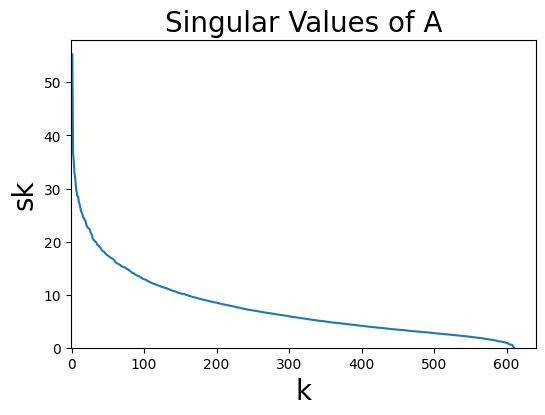

In [ ]:
import matplotlib.pyplot as plt        # package untuk melakukan visualisasi data
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'k',size=20)
plt.ylabel(r'sk',size=20)
plt.ylim(ymin = 0)
plt.xlim(xmin = -1)
plt.title(r'Singular Values of A',size=20)

In [80]:
userid = ({
    'userId':[611, 611, 611, 611, 611, 611, 611, 611, 611],
    'movieId' :[1, 2, 3, 4, 5, 6, 7, 8, 77],
    'rating':[4, 5, 5, 3, 3, 4, 3.5, 5, 4]
               })
df_test = pd.DataFrame(userid)

# menggabungkan data rating dari datasets dengan data rating dari database
data_merge = pd.concat([data_rating, df_test], ignore_index=True, sort=False)
data_merge.tail()

,userId,movieId,rating,timestamp
100840,611,5,3.0,NaN
100841,611,6,4.0,NaN
100842,611,7,3.5,NaN
100843,611,8,5.0,NaN
100844,611,77,4.0,NaN


In [81]:
ratings_base, ratings_test = train_test_split(data_merge, test_size=0.3, random_state=42)

# Create user - item matrix (row: user, column: item) start at 0
train_matrix = ratings_base.pivot(index="userId", columns="movieId", values="rating")
test_matrix = ratings_test.pivot(index="userId", columns="movieId", values="rating")

train_avrg = train_matrix.mean(axis=1)
centerd_train = train_matrix.sub(train_avrg,axis=0)

centerd_train.fillna(0,inplace=True)
test_matrix.fillna(0,inplace=True)

test_matrix = test_matrix.to_numpy()
train_matrix = centerd_train.to_numpy()

# Get u,s,vt by using SVD with k = 20
u, s, vt = svds(train_matrix, k = 6)
# Construction diagonal matrix
s_diag_matrix = np.diag(s)
# Get the predictions by finding the dot product of the three matrices
# np.dot(a,b) returns the dot product of a and b.
predictions_svd = np.dot(np.dot(u,s_diag_matrix),vt)
predictions_svd = predictions_svd + train_avrg.values.reshape(-1,1)
# Get predicted ratings from predictions svd matrix
# trả về ma trận có rating khác 0, dựa trên ma trận test_matrix
# Ground truth target values.
predicted_ratings_svd = predictions_svd[test_matrix.nonzero()]
# Estimated target values.
test_truth = test_matrix[test_matrix.nonzero()]
# Calculate MAE
MAE = mean_absolute_error(predicted_ratings_svd,test_truth)
print(f"Nilai MAE untuk k = 6 : {MAE}")

Nilai MAE untuk k = 6 : 0.7388782973934639


In [71]:
test_matrix.shape

(611, 6151)

In [ ]:
maeee = [0.782, 0.741, 0.742, 0.739, 0.745, 0.741, 0.744, 0.741, 0.739]

# ### Example recommendate for user 1

In [61]:
user_id = 611
user_ratings = predictions_svd[user_id-1,:]

# get all movies not ratings of user 1
train_unkown_indices = np.where(train_matrix[user_id-1,:] == 0)[0]

# get recommendations for user 1
user_recommendations = user_ratings[train_unkown_indices]

# train_unkown_indices
# user_recommendations.shape
user_ratings, train_unkown_indices, user_recommendations


(array([4., 4., 4., ..., 4., 4., 4.]),
 array([   0,    1,    2, ..., 8594, 8595, 8596]),
 array([4., 4., 4., ..., 4., 4., 4.]))

In [ ]:
user_ratings

array([4., 4., 4., ..., 4., 4., 4.])

In [ ]:
user_id = 612
user_ratings = predictions_svd[user_id-1,:]

# get all movies not ratings of user 1
train_unkown_indices = np.where(train_matrix[user_id-1,:] == 0)[0]

# get recommendations for user 1
user_recommendations = user_ratings[train_unkown_indices]

# train_unkown_indices
# user_recommendations.shape
user_ratings, train_unkown_indices, user_recommendations


(array([4.7508439 , 4.74973253, 4.74974608, ..., 4.75000018, 4.75000018,
        4.75000224]),
 array([   2,    3,    4, ..., 8555, 8556, 8557]),
 array([4.74974608, 4.74990007, 4.74915493, ..., 4.75000018, 4.75000018,
        4.75000224]))

In [ ]:
user_id = 613
user_ratings = predictions_svd[user_id-1,:]

# get all movies not ratings of user 1
train_unkown_indices = np.where(train_matrix[user_id-1,:] == 0)[0]

# get recommendations for user 1
user_recommendations = user_ratings[train_unkown_indices]

# train_unkown_indices
# user_recommendations.shape
user_ratings, train_unkown_indices, user_recommendations


(array([3.66430959, 3.6673094 , 3.6658236 , ..., 3.66666559, 3.66666559,
        3.6666581 ]),
 array([   3,    4,    5, ..., 8555, 8556, 8557]),
 array([3.66696001, 3.66929546, 3.66695519, ..., 3.66666559, 3.66666559,
        3.6666581 ]))

In [ ]:
user_id = 614
user_ratings = predictions_svd[user_id-1,:]

# get all movies not ratings of user 1
train_unkown_indices = np.where(train_matrix[user_id-1,:] == 0)[0]

# get recommendations for user 1
user_recommendations = user_ratings[train_unkown_indices]

# train_unkown_indices
# user_recommendations.shape
user_ratings, train_unkown_indices, user_recommendations


(array([4.49839219, 4.50058784, 4.50164798, ..., 4.50000008, 4.50000008,
        4.49999746]),
 array([   1,    3,    4, ..., 8555, 8556, 8557]),
 array([4.50058784, 4.50017971, 4.50140867, ..., 4.50000008, 4.50000008,
        4.49999746]))

In [40]:
user_id = 1
user_ratings = predictions_svd[user_id-1,:]

# get all movies not ratings of user 1
train_unkown_indices = np.where(train_matrix[user_id-1,:] == 0)[0]

# get recommendations for user 1
user_recommendations = user_ratings[train_unkown_indices]

# train_unkown_indices
# user_recommendations.shape
user_ratings, train_unkown_indices, user_recommendations


(array([4.40260082, 4.31477168, 4.318185  , ..., 4.32946387, 4.32946387,
        4.32967808]),
 array([   1,    3,    4, ..., 8563, 8564, 8565]),
 array([4.31477168, 4.32352916, 4.27449101, ..., 4.32946387, 4.32946387,
        4.32967808]))

In [63]:
# get numbers of movie ratings of user 1
# user_id : 1 , row : 0
row_of_user = user_id -1;
train_matrix[train_matrix[[row_of_user]].nonzero()].shape

(0,)

In [42]:
numbers_movie_rcm = 5 ;

print('\nRecommendations movies for user {} : \n'.format(user_id))

# Get recommendations of 5 movies with the highest scores

for movie_id in user_recommendations.argsort()[-numbers_movie_rcm:]:
    print(movie_id +1)


Recommendations movies for user 1 : 

3237
795
457
591
247


In [55]:
numbers_movie_rcm = 5 ;

print('\nRecommendations movies for user {} : \n'.format(user_id))

# Get recommendations of 5 movies with the highest scores

for movie_id in user_recommendations.argsort()[-numbers_movie_rcm:]:
    print(movie_id +1)


Recommendations movies for user 1 : 

29
590
789
460
250


In [64]:
numbers_movie_rcm = 5 ;

print('\nRecommendations movies for user {} : \n'.format(user_id))

# Get recommendations of 5 movies with the highest scores

for movie_id in user_recommendations.argsort()[-numbers_movie_rcm:]:
    print(movie_id + 1)


Recommendations movies for user 611 : 

2858
2857
2856
2870
8597
